In [1]:
import os

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

# %matplotlib notebook 
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from scipy.ndimage.filters import gaussian_filter
import LFP_functions as LFPF
import ProbeAnalysis_functions as ProbeF

import scipy.signal as signal
import scipy.io as sio

In [2]:
# set necessary paths
if not os.path.exists('preliminary_results'):
    os.mkdir('preliminary_results')

In [3]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join("/Volumes/Elham-Unifr/Data/AllenBrain/ecephys_project_cache", "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()


In [4]:
os.listdir("/Volumes/Elham-Unifr/Data/AllenBrain/ecephys_project_cache")

['session_767871931',
 'channels.csv',
 'copy-session_781842082 - Copy',
 'manifest.json',
 'probes.csv',
 'sessions.csv',
 'session_766640955',
 'session_768515987',
 'session_771160300',
 'session_771990200',
 'session_774875821',
 'session_778240327',
 'session_778998620',
 'session_779839471',
 'session_781842082',
 'session_793224716',
 'session_819186360',
 'session_821695405',
 'session_847657808',
 'units.csv']

In [5]:
brain_observatory_type_sessions = sessions[sessions["session_type"] == "functional_connectivity"]
brain_observatory_type_sessions.reset_index(inplace=True)

In [6]:
# test
session_id = 766640955
session = cache.get_session_data(session_id)

probe_id = session.probes.index.values[0]
lfp = session.get_lfp(probe_id)

structure_acronyms, intervals = session.channel_structure_intervals(lfp["channel"])
interval_midpoints = [aa + (bb - aa) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]

print(structure_acronyms)
print(intervals)


lfp.shape

['MB' 'APN' 'NOT' 'DG' 'CA1' 'VISam' nan]
[ 0  7 24 28 32 55 79 88]


(12254156, 88)

In [7]:
session.channels.head(2)

,probe_horizontal_position,local_index,probe_vertical_position,probe_id,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,
850023022,59,382,3840,773592315,NaN,NaN,7354,133,7552
850023018,43,380,3820,773592315,NaN,NaN,7354,133,7552


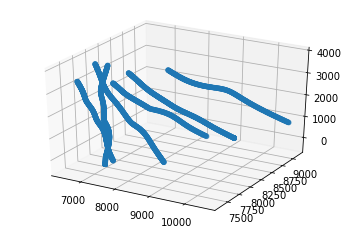

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

x_coords = session.channels.left_right_ccf_coordinate
y_coords = session.channels.anterior_posterior_ccf_coordinate
color = session.channels.dorsal_ventral_ccf_coordinate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords,y_coords,color)



#### Load Data for a session

In [ ]:
session_id = {766640955,767871931,768515987,771160300,771990200,774875821,778240327,778998620,779839471,781842082,821695405}
session_id = {767871931,768515987,771160300,771990200,774875821,778240327,778998620,779839471,781842082,821695405}
for S_id in session_id:
    print(S_id)
    
    session = cache.get_session_data(S_id)
    
    # set necessary paths
    if not os.path.exists(os.path.join('../preliminary_results',str(S_id))):
        os.mkdir(os.path.join('../preliminary_results',str(S_id)))

    Resultspath = os.path.join('../preliminary_results',str(S_id))
    
    for I in range(0,session.probes.index.values.shape[0]):
        probe_id = session.probes.index.values[I]
        
        # first extract probe info and save
        #extract_probeinfo(session,probe_id,Resultspath)
        
        # load lfp data
        lfp = session.get_lfp(probe_id)
        
        # extract and prepare the data for a condition
        cond_name = 'drifting_gratings_75_repeats'
        Prestim = 1 # prestimulus time in sec
        down_rate = 5 # down sampling -> the original sampling rate is 1250 Hz 
        #prepare_condition(session,lfp,probe_id,cond_name,Resultspath,Prestim,down_rate)
        
        # plot the receptive field mapping for the probe
        ProbeF.RF_mapping_plot(session,lfp,probe_id,Resultspath)
        
        # CSD plot for the probe
        #CSD_plots(session,lfp,probe_id,Resultspath)
       


781842082
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
778240327
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
771160300
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
774875821
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/ProbeAnalysis_functions.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(round(Data_final.shape[0]/2), 3, figsize=(4, round(Data_final.shape[0]/2)*2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
821695405
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/ProbeAnalysis_functions.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(round(Data_final.shape[0]/2), 3, figsize=(4, round(Data_final.shape[0]/2)*2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
779839471
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/ProbeAnalysis_functions.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(round(Data_final.shape[0]/2), 3, figsize=(4, round(Data_final.shape[0]/2)*2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
768515987
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/ProbeAnalysis_functions.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(round(Data_final.shape[0]/2), 3, figsize=(4, round(Data_final.shape[0]/2)*2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
771990200
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in greater
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]
/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/LFP_functions.py:16: RuntimeWarning: invalid value encountered in less
  Tind = np.where((T>TW[0]) & (T<TW[1]))[0]


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


/Users/elhamb/Documents/Data/AllenBrainObserver/python codes/ProbeAnalysis_functions.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(round(Data_final.shape[0]/2), 3, figsize=(4, round(Data_final.shape[0]/2)*2))


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
0
5
10
15


# Functions: In the ProbeAnalysis_functions.py

Save probe location and ROI labels in matlab file: ProbeF.extract_probeinfo

Extract lfp from a condition and plot them and export in matlab format: ProbeF.prepare_condition

Plot CSD of the electrodes, from flashes condition: ProbeF.CSD_plots

Run RF mapping and plot the results: ProbeF.RF_mapping_plot